# HandsOn3

# Handayani
## 122140166

Link: https://drive.google.com/drive/folders/1VQuEpGN9jxOnBpFWslRrVxhBGvqLX0iF?usp=sharing

## Face Detection

1. Deteksi ROI (bagian) wajah terlebih dahulu.
2. Berdasarkan ROI Wajah, sesuaikanlah ROI tersebut untuk menyeleksi area bahu hingga dada.
3. Gambarkan bounding box untuk area bahu hingga dada tersebut, dan bounding box harus diperbesar sebesar 150% dari ukuran awal
4. Tampilkan hasilnya beserta penjelasannya.

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

Akses modul face detection dari mediapipe
kemudian pilih model deteksi wajah mediapipe. Disini saya menentukan model_selection=1 karena wajahnya dekat.
ambang batas probabilitas 0.5 untuk mendeteksi wajah.

In [2]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(
    model_selection=1,  # Model untuk jarak dekat
    min_detection_confidence=0.5
)

nama file saya= yani.mp4

In [3]:
video_path = "yani.mp4"
cap = cv2.VideoCapture(video_path)

dengan menggunakan opencv, video dibuka. Jika video tidak bisa dibuka, maka proses akan langsung di hentikan.

untuk mendeteksi wajah dengan mediapipe. frame pertama akan dikonversi ke format RGB agar kompatibel dengan mediapipenya, kemudian dengan menggunakan model deteksi mediapipe wajah frame tersebut dideteksi dan hanya akan diambil satu wajah pertama.

kemudian pada bagian akhir kode, divisualisasikan hasil dengan menampilkan gambar frame yang ada bounding boxnya, crop wajah, dan crop ROI bahu-dada yang diperbesar (150%)


=== Informasi ROI Bahu-Dada ===
Dimensi Frame      : 1920 x 1080
Bounding Box Wajah : (840, 210) - (1012, 382)
ROI Awal Bahu-Dada : (772, 382) - (1081, 726)
ROI Diperbesar     : (695, 296) - (1158, 812)


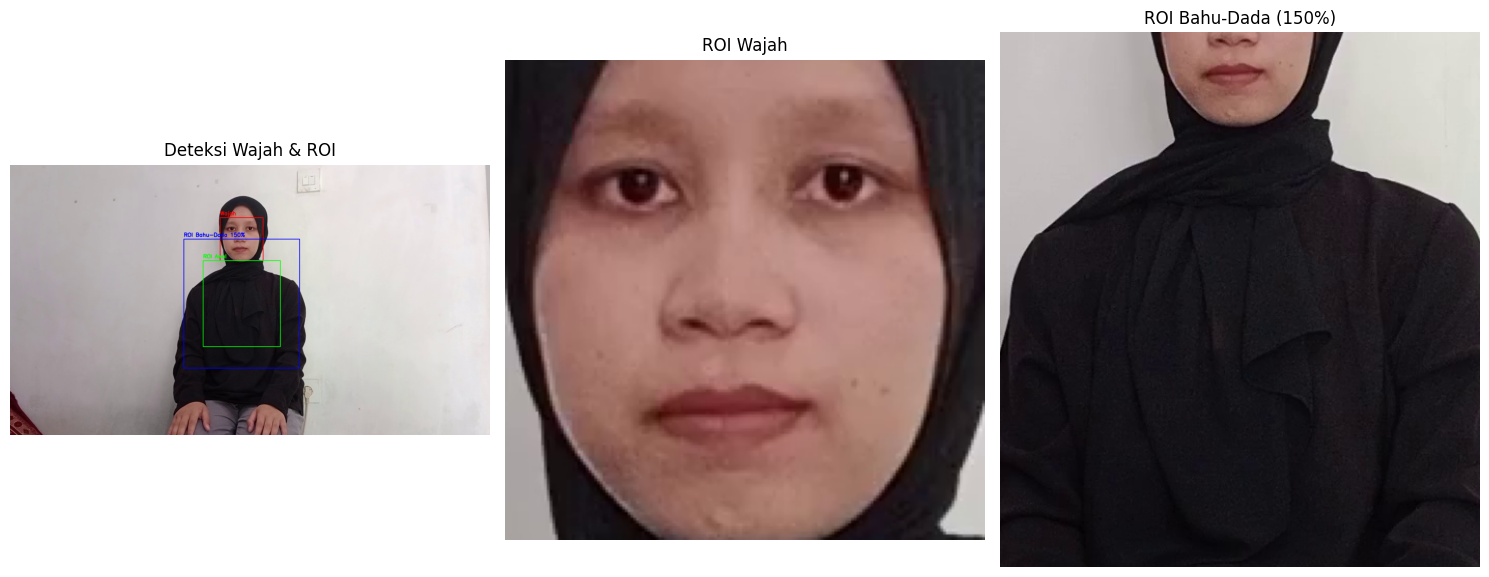

In [4]:
if not cap.isOpened():
    print(f"[ERROR] Tidak dapat membuka video: {video_path}")
else:
    ret, frame = cap.read()
    if not ret:
        print("[ERROR] Tidak dapat membaca frame pertama dari video.")
        cap.release()
    else:
        # Konversi BGR ke RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        height, width, _ = frame.shape
        # Deteksi wajah
        results = face_detection.process(rgb_frame)
        vis_img = rgb_frame.copy()

        if results.detections:
            detection = results.detections[0]  # ambil deteksi pertama

            bbox = detection.location_data.relative_bounding_box
            x_min = int(bbox.xmin * width)
            y_min = int(bbox.ymin * height)
            w_face = int(bbox.width * width)
            h_face = int(bbox.height * height)
            x_max = x_min + w_face
            y_max = y_min + h_face

            # Gambar bounding box wajah (biru)
            cv2.rectangle(vis_img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(vis_img, "Wajah", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            # Estimasi ROI bahu-dada dari posisi wajah
            shoulder_ratio = 1.8
            chest_ratio = 2.0

            roi_width = int(w_face * shoulder_ratio)
            roi_height = int(h_face * chest_ratio)

            roi_x_min = max(0, x_min + w_face // 2 - roi_width // 2)
            roi_y_min = y_max
            roi_x_max = min(width, roi_x_min + roi_width)
            roi_y_max = min(height, roi_y_min + roi_height)

            # Gambar ROI awal bahu-dada (hijau)
            cv2.rectangle(vis_img, (roi_x_min, roi_y_min), (roi_x_max, roi_y_max), (0, 255, 0), 2)
            cv2.putText(vis_img, "ROI Awal", (roi_x_min, roi_y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            # Perbesar ROI menjadi 150%
            '''Untuk menangkap area yang lebih luas dan memberikan konteks yang lebih menyeluruh, 
            ROI awal bahu-dada diperbesar sebesar 150%. Proses ini dilakukan dengan memperluas bounding box 
            dari titik tengah secara proporsional. Hasilnya adalah ROI baru dengan koordinat kiri atas di (695, 296) dan kanan 
            bawah di (1158, 812), yang mencakup bagian lebih luas dari tubuh bagian atas.'''
            center_x = roi_x_min + roi_width // 2
            center_y = roi_y_min + roi_height // 2

            enlarged_width = int(roi_width * 1.5)
            enlarged_height = int(roi_height * 1.5)

            enlarged_x_min = max(0, center_x - enlarged_width // 2)
            enlarged_y_min = max(0, center_y - enlarged_height // 2)
            enlarged_x_max = min(width, enlarged_x_min + enlarged_width)
            enlarged_y_max = min(height, enlarged_y_min + enlarged_height)

            # Gambar ROI diperbesar (merah)
            cv2.rectangle(vis_img, (enlarged_x_min, enlarged_y_min), (enlarged_x_max, enlarged_y_max), (0, 0, 255), 2)
            cv2.putText(vis_img, "ROI Bahu-Dada 150%", (enlarged_x_min, enlarged_y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            # Tampilkan informasi
            print("\n=== Informasi ROI Bahu-Dada ===")
            print(f"Dimensi Frame      : {width} x {height}")
            print(f"Bounding Box Wajah : ({x_min}, {y_min}) - ({x_max}, {y_max})")
            print(f"ROI Awal Bahu-Dada : ({roi_x_min}, {roi_y_min}) - ({roi_x_max}, {roi_y_max})")
            print(f"ROI Diperbesar     : ({enlarged_x_min}, {enlarged_y_min}) - ({enlarged_x_max}, {enlarged_y_max})")

            # Ekstrak dan tampilkan ROI
            face_crop = rgb_frame[y_min:y_max, x_min:x_max]
            chest_crop = rgb_frame[enlarged_y_min:enlarged_y_max, enlarged_x_min:enlarged_x_max]

            # Visualisasi menggunakan Matplotlib
            plt.figure(figsize=(15, 6))

            plt.subplot(1, 3, 1)
            plt.imshow(vis_img)
            plt.title("Deteksi Wajah & ROI")
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(face_crop)
            plt.title("ROI Wajah")
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(chest_crop)
            plt.title("ROI Bahu-Dada (150%)")
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        else:
            print("Tidak ada wajah terdeteksi pada frame.")
            plt.imshow(vis_img)
            plt.title("Tidak Ada Wajah Terdeteksi")
            plt.axis('off')
            plt.show()

        cap.release()
        face_detection.close()

Hasil dari proses ini ditampilkan dalam tiga bagian gambar. Gambar pertama menunjukkan hasil deteksi wajah dan ROI bahu-dada pada video asli dengan bounding box. Gambar kedua menampilkan potongan khusus dari ROI wajah. Gambar ketiga memperlihatkan ROI bahu-dada yang telah diperbesar 150%, menunjukkan cakupan area yang lebih luas dari tubuh bagian atas pengguna.

# Facial Landmark

1. Gambarkanlah bounding box untuk area mata, hidung, mulut.
2. Beri tanda titik di bagian tengah bola mata. Tuliskan teks label pada tiap bagian (mata, hidung dan mulut) dengan warna yang berbeda.
3. Simpanlah hasilnya dalam format video, dan cantumkan link drivenya.

In [5]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

In [6]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    refine_landmarks=True,  # agar iris tersedia (468, 473)
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

Kode ini untuk mengidentifikasi landmark wajah tertentu (mata, mulut, iris, hidung) menggunakan MediaPipe Face Mesh. MediaPipe Face Mesh menyediakan total 478 titik landmark wajah yang bisa digunakan untuk analisis atau pelacakan bagian wajah tertentu.

> iris_kiri dan iris_kanan adalah titik spesifik untuk iris bola mata, sesuai dokumentasi MediaPipe.

>Hidung: MediaPipe tidak menyediakan konstanta seperti FACEMESH_NOSE, jadi harus dipilih manual berdasarkan dokumentasi atau eksplorasi visual (misalnya dari output visual landmark).

In [7]:
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_LEFT_EYE, FACEMESH_RIGHT_EYE, FACEMESH_LIPS

mata_kiri = list(set(i for pair in FACEMESH_LEFT_EYE for i in pair))
mata_kanan = list(set(i for pair in FACEMESH_RIGHT_EYE for i in pair))
mulut = list(set(i for pair in FACEMESH_LIPS for i in pair))
iris_kiri = 468
iris_kanan = 473
hidung = [168, 6, 197, 195, 5, 4, 45, 220, 115, 49, 131, 134, 51, 5, 281]

Selanjutnya ambil informasi dasar dari videonya (lebar, tinggi, dan fps). Kemudian simpan hasil video baru dengan nama 'Facial_Landmark.mp4'. 
> variabel frame_ke_1 diinisialisasi none untuk menyimpan frame pertama dari video.

In [8]:
# Buka video
cap = cv2.VideoCapture('yani.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter('Facial_Landmark.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

frame_ke_1 = None  # Untuk menyimpan 1 frame pertama

implementasi loop "while" untuk melakukan loop selama video masih dibaca.
1. Ukuran frame akan diambil dan diubah ke bentuk RGB
2. face_mesh.process(rgb), untuk mendeteksi landmark wajah di frame.
3. jika deteksi berhasil, maka results.multi_face_landmarks akan berisi daftar landmark.
4. loop akan berjalan untuk setiap wajah yang terdeteksi.
5. x dan y list untuk mengambil semua koordinat mata kiri dan menghitung bounding box-nya.
6. cv2.rectangle...  untuk menggambar kotak dan label.
7. cx,cy,cv2.circle.... untuk menambahkan titik irisnya.


1. x_list = [int(flm.landmark[i].x * lebar) for i in hidung]
2. y_list = [int(flm.landmark[i].y * tinggi) for i in hidung]
kode diatas untuk menggunakan titik-titik manual dari list hidung, dan kemudian diberi label 'hidung' warna merah.

Kode selanjutnya dengan mengambil titik dari list mulut (berasal dari FACEMESH_LIPS). Kemudian gambar kotak warna kuning kebiru-biruan (255, 255, 0).

1. except:
    > print("⚠️ Landmark tidak lengkap, dilewati.")
    > continue
kode tersebut digunakan untuk penanganan eror.

In [9]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    tinggi, lebar, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        for flm in results.multi_face_landmarks:
            try:
                # === MATA KIRI ===
                x_list = [int(flm.landmark[i].x * lebar) for i in mata_kiri]
                y_list = [int(flm.landmark[i].y * tinggi) for i in mata_kiri]
                x_min, y_min, x_max, y_max = min(x_list), min(y_list), max(x_list), max(y_list)
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                cv2.putText(frame, "Mata Kiri", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                cx = int(flm.landmark[iris_kiri].x * lebar)
                cy = int(flm.landmark[iris_kiri].y * tinggi)
                cv2.circle(frame, (cx, cy), 3, (255, 255, 255), -1)

                # === MATA KANAN ===
                x_list = [int(flm.landmark[i].x * lebar) for i in mata_kanan]
                y_list = [int(flm.landmark[i].y * tinggi) for i in mata_kanan]
                x_min, y_min, x_max, y_max = min(x_list), min(y_list), max(x_list), max(y_list)
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
                cv2.putText(frame, "Mata Kanan", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

                cx = int(flm.landmark[iris_kanan].x * lebar)
                cy = int(flm.landmark[iris_kanan].y * tinggi)
                cv2.circle(frame, (cx, cy), 3, (255, 255, 255), -1)

                # === HIDUNG ===
                x_list = [int(flm.landmark[i].x * lebar) for i in hidung]
                y_list = [int(flm.landmark[i].y * tinggi) for i in hidung]
                x_min, y_min, x_max, y_max = min(x_list), min(y_list), max(x_list), max(y_list)
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
                cv2.putText(frame, "Hidung", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                # === MULUT ===
                x_list = [int(flm.landmark[i].x * lebar) for i in mulut]
                y_list = [int(flm.landmark[i].y * tinggi) for i in mulut]
                x_min, y_min, x_max, y_max = min(x_list), min(y_list), max(x_list), max(y_list)
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 255, 0), 2)
                cv2.putText(frame, "Mulut", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

                if frame_ke_1 is None:
                    frame_ke_1 = frame.copy()
            except:
                print("⚠️ Landmark tidak lengkap, dilewati.")
                continue

    out.write(frame)

cap.release()
out.release()

Selanjutnya dicek apakah ada frame pertama (frame_ke_1) yang berhasil dideteksi dan disimpan. Jika ada: Ubah warnanya dari BGR ke RGB agar warna tampil normal di matplotlib. Tampilkan frame menggunakan plt.imshow dengan judul "Hasil Deteksi Face Mesh".

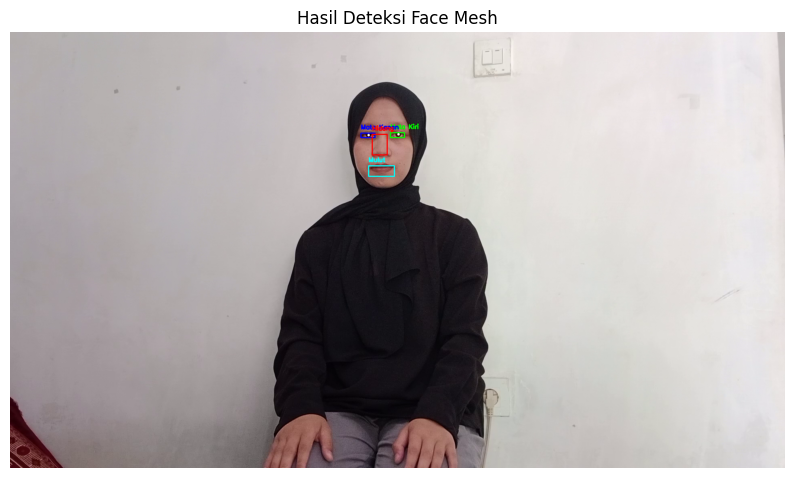

✅ Video selesai diproses dan disimpan ke: Facial_Landmark.mp4


In [10]:
# Tampilkan frame pertama
if frame_ke_1 is not None:
    frame_rgb = cv2.cvtColor(frame_ke_1, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title("Hasil Deteksi Face Mesh")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ Tidak ada frame yang berhasil diproses")

print("✅ Video selesai diproses dan disimpan ke: Facial_Landmark.mp4")

# Bersihkan
face_mesh.close()

# Tracking Wajah

1. Tempelkan sebuah .png pada wajah anda (bisa di landmark lain, selain mata)
2. Modifikasi kode 3_tracking_wajah.py agar lebih smooth Tips:
3. Lakukan deteksi landmark tidak di setiap frame, melainkan setiap beberapa frame
4. Misal. Deteksi landmark hanya dilakukan per setiap detik (atau 30 frame sekali)
5. Simpanlah hasilnya dalam format video, dan cantumkan link drivenya.

In [11]:
# Import
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

1. mp_face_mesh = mp.solutions.face_mesh
> Mengakses modul face_mesh dari pustaka MediaPipe dan menyimpannya ke dalam variabel mp_face_mesh.

2. face_mesh = mp_face_mesh.FaceMesh(...)
> Membuat objek face_mesh untuk mendeteksi landmark wajah (468 titik wajah). Konfigurasi parameter: 
> static_image_mode=False:
>> Menandakan bahwa input berupa video/stream, bukan gambar statis.
>> MediaPipe akan melacak wajah antar frame, bukan mendeteksi ulang di setiap frame.
> max_num_faces=1:
>> Hanya deteksi maksimal 1 wajah saja per frame.
> min_detection_confidence=0.5:
>> Batas minimum confidence (kepercayaan) untuk mendeteksi wajah di awal. (Semakin tinggi, semakin ketat.)
> min_tracking_confidence=0.5:
>> Batas minimum confidence untuk melacak wajah di frame berikutnya.

In [12]:
# STEP1: Inisialisasi Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

LIPS_INDICES adalah daftar index titik-titik (landmarks) yang merepresentasikan bibir bagian luar pada model MediaPipe Face Mesh.

In [13]:
# STEP2: Landmark bibir luar (luar bibir)
LIPS_INDICES = [61, 146, 91, 181, 84, 17, 314, 405, 321, 375,
                291, 409, 270, 269, 267, 0, 37, 39, 40, 185]

Siapkan gambar bibir yang akan ditempelkan pada posisi landmark bibir yang terdeteksi. Pastikan format gambar bibirnya .png

In [14]:
# STEP3: Load gambar bibir dan hapus latar belakang putih
lip_image_path = "lip.png"
lip_image = cv2.imread(lip_image_path, cv2.IMREAD_UNCHANGED)
if lip_image is None:
    print("Gambar lip tidak ditemukan!")
    exit()

Hapus latar belakang putih pada gambar lip.png jika gambar tidak memiliki alpha channel (transparansi) bawaan.

In [15]:
# Jika tidak memiliki alpha channel, konversi ke BGRA dan buat putih menjadi transparan
if lip_image.shape[2] == 3:
    lip_image = cv2.cvtColor(lip_image, cv2.COLOR_BGR2BGRA)
    mask = np.all(lip_image[:, :, :3] > 240, axis=2)
    lip_image[mask, 3] = 0

Menjamin bahwa file video tersedia dan bisa diproses sebelum melanjutkan ke langkah berikutnya 

In [16]:
# STEP4: Buka video input
video_path = "yani.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Video gagal dibuka.")
    exit()

Langkah selanjutnya adalah menyiapkan video output dengan ukuran dan kecepatan yang sama seperti input, sehingga semua hasil pemrosesan (misalnya tempelan bibir, landmark wajah) bisa direkam dalam video baru.

In [17]:
# STEP5: Setup output video
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter("Tracking_Wajah.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

Mengatur agar hanya 5 frame dari video yang akan diproses secara khusus (misalnya untuk ditambahkan gambar bibir). Menjadwalkan deteksi landmark secara periodik (setiap 30 frame), bukan di setiap frame, untuk efisiensi.

In [18]:
# STEP6: Siapkan pengambilan 5 frame 
start_frame = int(10 * fps)
sample_frames = []
capture_count = 0

frame_idx = 0
landmark_cache = None
interval = 30  # Deteksi landmark setiap 30 frame

Selanjutnya semua frame dibaca, lalu dilakukan deteksi wajah secara berkala. Kemudian ambil landmark bibir dan tempelkan gambar bibir, terakhir simpan video hasilnya dan hasil dari 5 frame untuk ditampilkan sebagai output.

In [19]:
# STEP7: Proses frame video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Deteksi landmark setiap interval
    if frame_idx % interval == 0 or landmark_cache is None:
        results = face_mesh.process(rgb)
        if results.multi_face_landmarks:
            landmark_cache = results.multi_face_landmarks[0]

    # STEP8: Jika landmark tersedia, overlay gambar bibir
    if landmark_cache:
        lip_points = []
        for idx in LIPS_INDICES:
            pt = landmark_cache.landmark[idx]
            x = int(pt.x * w)
            y = int(pt.y * h)
            lip_points.append((x, y))
        lip_points = np.array(lip_points)

        x, y, bw, bh = cv2.boundingRect(lip_points)
        margin = int(max(bw, bh) * 0.1)
        x = max(0, x - margin)
        y = max(0, y - margin)
        bw = min(w - x, bw + 2 * margin)
        bh = min(h - y, bh + 2 * margin)

        # Resize overlay
        overlay = cv2.resize(lip_image, (bw, bh))
        h_ol, w_ol = overlay.shape[:2]

        # STEP9: Tempelkan overlay ke frame
        if overlay.shape[2] == 4:
            alpha = overlay[:, :, 3] / 255.0
            for c in range(3):
                frame[y:y+h_ol, x:x+w_ol, c] = (
                    alpha * overlay[:, :, c] +
                    (1 - alpha) * frame[y:y+h_ol, x:x+w_ol, c]
                )

    # Simpan ke video output
    out.write(frame)

    # Ambil 5 frame dari detik ke-10
    if frame_idx >= start_frame and capture_count < 5:
        sample_frames.append(frame.copy())
        capture_count += 1

    frame_idx += 1

In [20]:
# STEP10: Tutup semua resource
cap.release()
out.release()

Selanjutnya sajikan hasil akhir berupa 5 gambar dari video yang sudah diberi overlay gambar bibir. 

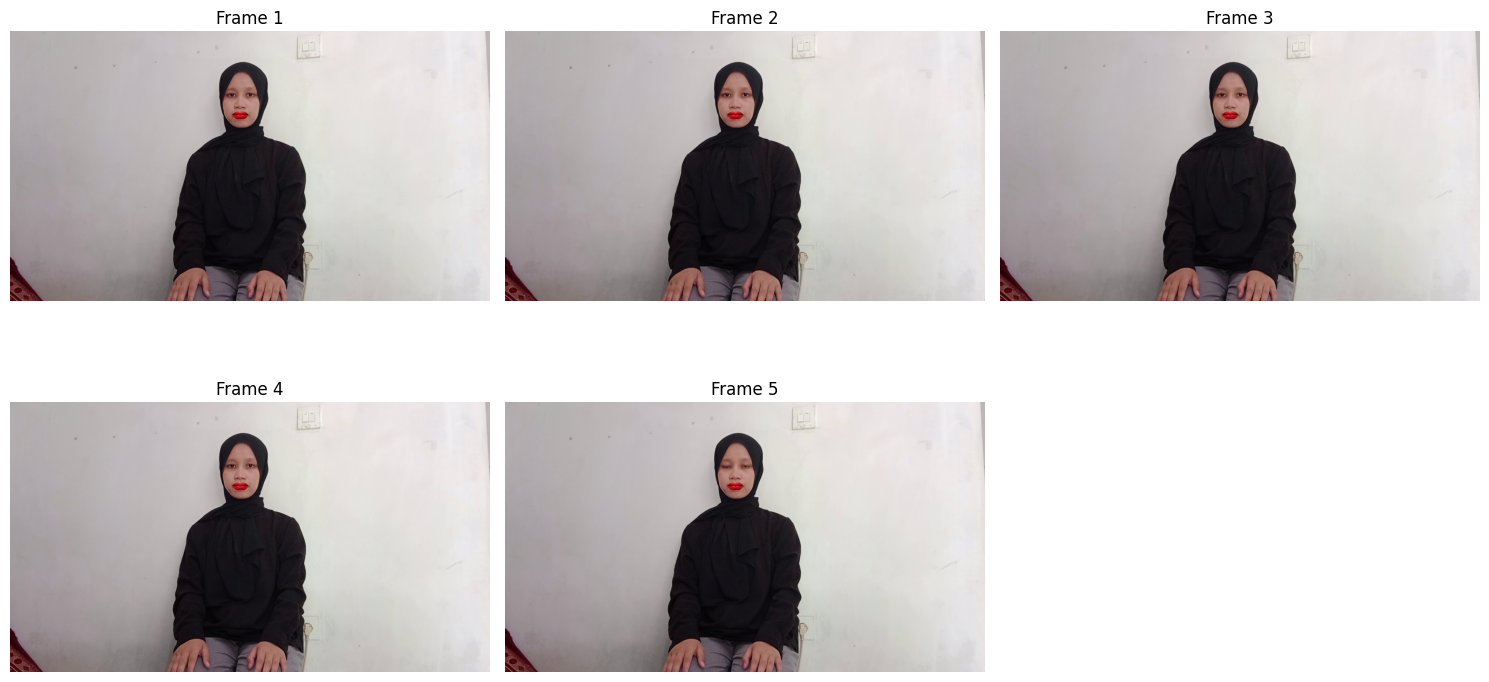

Selesai! Video disimpan di: Tracking_Wajah.mp4


In [21]:
# STEP11: Tampilkan 5 frame hasil detik ke-10
fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 3, figure=fig)
for i, f in enumerate(sample_frames):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    ax.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Frame {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.savefig("frames.png")
plt.show()

print("Selesai! Video disimpan di: Tracking_Wajah.mp4")

# Pose Landmark

1. Deteksi pose landmark pada tubuh menggunakan pustaka seperti MediaPipe.
2. Tandai dan beri label tiga titik berikut pada tubuh bahu kiri, bahu kanan, dan pinggul tengah.
3. Gambarkan garis yang menghubungkan bahu kiri–kanan dan bahu ke pinggul.
4. Tampilkan hasilnya dalam sebuah gambar/frame.
5. Berikan penjelasan mengenai posisi dan fungsi dari ketiga titik tersebut dalam pemetaan postur tubuh.

In [22]:
# Import
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# STEP1: Inisialisasi MediaPipe Pose
mp_pose = mp.solutions.pose # akses modul pose dari mediapipe.solutions
mp_drawing = mp.solutions.drawing_utils # untilitas untuk menggambar landmark dan koneksi pada gambar
mp_style = mp.solutions.drawing_styles # digunakan untuk menggambar pose agar terlihat lebih rapi.

pose = mp_pose.Pose(
    static_image_mode=False, #Kode ini memberikan parameter input berupa video, sehingga akan menggunakan tracking antar frame.
    model_complexity=1, # artinya kompleksitas model adalah sedang
    min_detection_confidence=0.5, # Nilai minimum keyakinan model untuk mendeteksi pose awal. Artinya hanya pose dengan confidence ≥ 0.5 yang akan dianggap valid.
    min_tracking_confidence=0.5 # Nilai minimum keyakinan model untuk melacak pose setelah terdeteksi. Artinya hanya pose dengan confidence ≥ 0.5 yang akan dianggap valid.
)

Buka file video yani.mp4

In [24]:
# STEP2: Buka video input
VIDEO_PATH = 'yani.mp4'
cap = cv2.VideoCapture(VIDEO_PATH)

if not cap.isOpened():
    print("Gagal membuka video.")
    exit()

In [25]:
# STEP3: Konfigurasi output video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [26]:
# Gunakan codec mp4v, simpan sebagai .mp4
out = cv2.VideoWriter('Pose_Landmark.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

frame_ke_1 = None  # Simpan 1 frame pertama untuk ditampilkan di akhir

In [27]:
# STEP4: Proses semua frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Selesai membaca video.")
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb_frame)

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark

        # STEP5: Ambil titik bahu dan pinggul
        l_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
        r_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
        l_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
        r_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]

        pt_l_shoulder = (int(l_shoulder.x * width), int(l_shoulder.y * height))
        pt_r_shoulder = (int(r_shoulder.x * width), int(r_shoulder.y * height))
        pt_l_hip = (int(l_hip.x * width), int(l_hip.y * height))
        pt_r_hip = (int(r_hip.x * width), int(r_hip.y * height))
        pt_mid_hip = (
            int((l_hip.x + r_hip.x) * width / 2),
            int((l_hip.y + r_hip.y) * height / 2)
        )

        # STEP6: Gambar pose & garis tambahan
        mp_drawing.draw_landmarks(
            frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_style.get_default_pose_landmarks_style()
        )

        # Garis dan label
        cv2.line(frame, pt_l_shoulder, pt_r_shoulder, (255, 0, 0), 3)
        cv2.line(frame, pt_l_shoulder, pt_mid_hip, (0, 255, 0), 3)
        cv2.line(frame, pt_r_shoulder, pt_mid_hip, (0, 0, 255), 3)

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, "LEFT_SHOULDER", (pt_l_shoulder[0] - 20, pt_l_shoulder[1] - 10), font, 0.5, (255, 255, 255), 2)
        cv2.putText(frame, "RIGHT_SHOULDER", (pt_r_shoulder[0] - 20, pt_r_shoulder[1] - 10), font, 0.5, (255, 255, 255), 2)
        cv2.putText(frame, "MID_HIP", (pt_mid_hip[0] - 20, pt_mid_hip[1] - 10), font, 0.5, (255, 255, 255), 2)

        cv2.circle(frame, pt_l_shoulder, 5, (255, 0, 0), -1)
        cv2.circle(frame, pt_r_shoulder, 5, (255, 0, 0), -1)
        cv2.circle(frame, pt_mid_hip, 5, (255, 0, 0), -1)

    # Simpan frame pertama untuk ditampilkan dengan matplotlib
    if frame_ke_1 is None:
        frame_ke_1 = frame.copy()

    # STEP7: Tulis ke file video
    out.write(frame)

Selesai membaca video.


In [28]:
# STEP8: Tutup semua resource
cap.release() # digunakan untuk menutup akses ke video input, yaitu file video yang dibaca menggunakan cv2.VideoCapture()
out.release() # digunakan untuk menyelesaikan dan menyimpan hasil video output yang telah ditulis menggunakan cv2.VideoWriter()

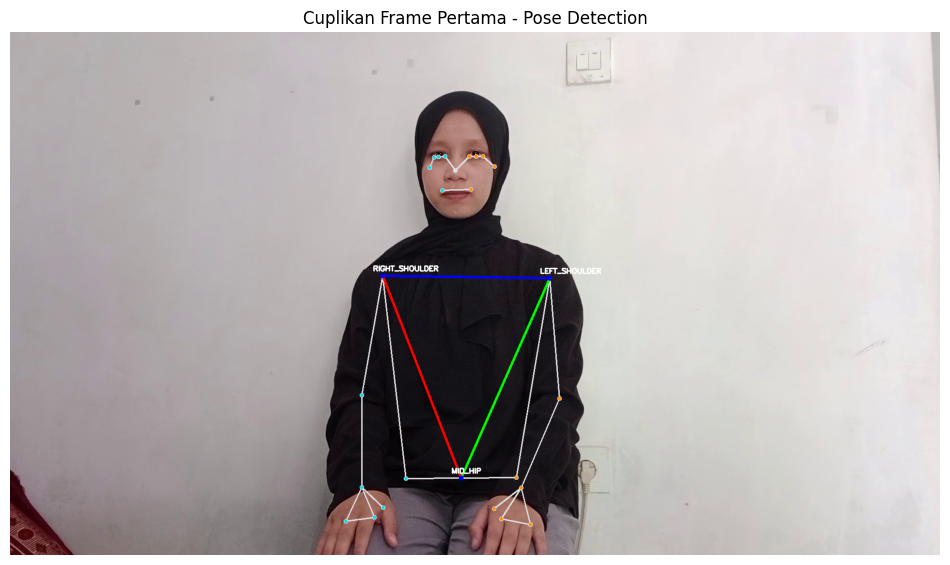

✅ Video selesai diproses dan disimpan ke: pose_landmark.mp4


In [29]:
# STEP9: Tampilkan 1 frame pertama untuk verifikasi hasil
if frame_ke_1 is not None:
    frame_rgb = cv2.cvtColor(frame_ke_1, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(frame_rgb)
    plt.title("Cuplikan Frame Pertama - Pose Detection")
    plt.axis('off')
    plt.show()

print("✅ Video selesai diproses dan disimpan ke: pose_landmark.mp4")

Tampilan kode memperlihatkan keberhasilan dalam menerapkan algoritma pendeteksian pose tubuh menggunakan MediaPipe Pose pada frame pertama dari video. 
> Garis yang menghubungkan bahu kiri dan kanan (LEFT_SHOULDER – RIGHT_SHOULDER) merepresentasikan kesejajaran dan lebar tubuh bagian atas. Garis ini digunakan untuk menganalisis apakah postur tubuh berada dalam posisi tegak atau miring. Jika garis ini condong ke satu sisi, maka dapat disimpulkan bahwa posisi bahu tidak sejajar, yang menunjukkan kemiringan atau rotasi tubuh.

>> Sementara itu, garis-garis yang menghubungkan bahu ke titik tengah pinggul (LEFT_SHOULDER – MID_HIP dan RIGHT_SHOULDER – MID_HIP) berfungsi untuk menunjukkan kesimetrisan tubuh bagian kiri dan kanan serta kestabilan postur. Kedua garis ini membantu mengidentifikasi apakah tubuh condong ke depan/belakang atau ke samping, dan sangat berguna dalam pemantauan postur, rehabilitasi, serta animasi gerakan tubuh.

# Referensi

![Cuplikan layar 2025-05-13 215652.png](<attachment:Cuplikan layar 2025-05-13 215652.png>) ![Cuplikan layar 2025-05-13 215843.png](<attachment:Cuplikan layar 2025-05-13 215843.png>) ![Cuplikan layar 2025-05-13 215834.png](<attachment:Cuplikan layar 2025-05-13 215834.png>) ![Cuplikan layar 2025-05-13 215826.png](<attachment:Cuplikan layar 2025-05-13 215826.png>) ![Cuplikan layar 2025-05-13 215821.png](<attachment:Cuplikan layar 2025-05-13 215821.png>) ![Cuplikan layar 2025-05-13 215803.png](<attachment:Cuplikan layar 2025-05-13 215803.png>) ![Cuplikan layar 2025-05-13 215754.png](<attachment:Cuplikan layar 2025-05-13 215754.png>) ![Cuplikan layar 2025-05-13 215708.png](<attachment:Cuplikan layar 2025-05-13 215708.png>)
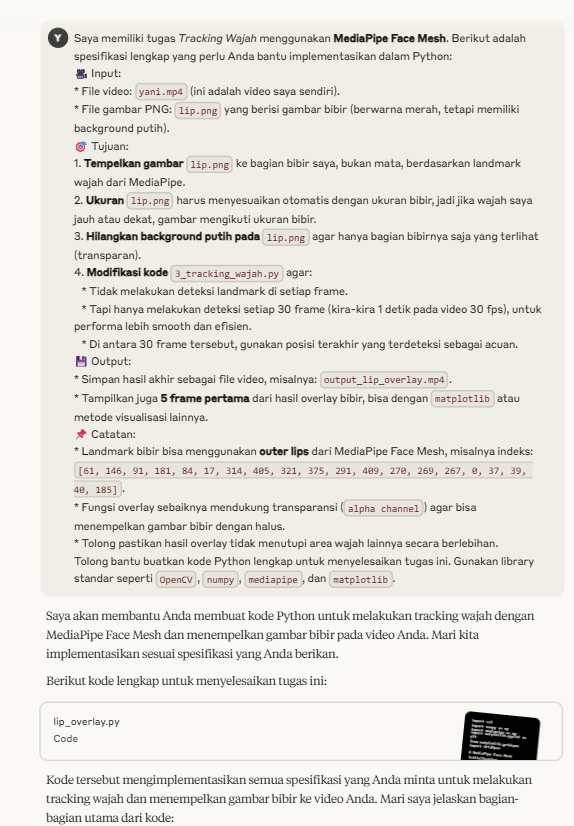
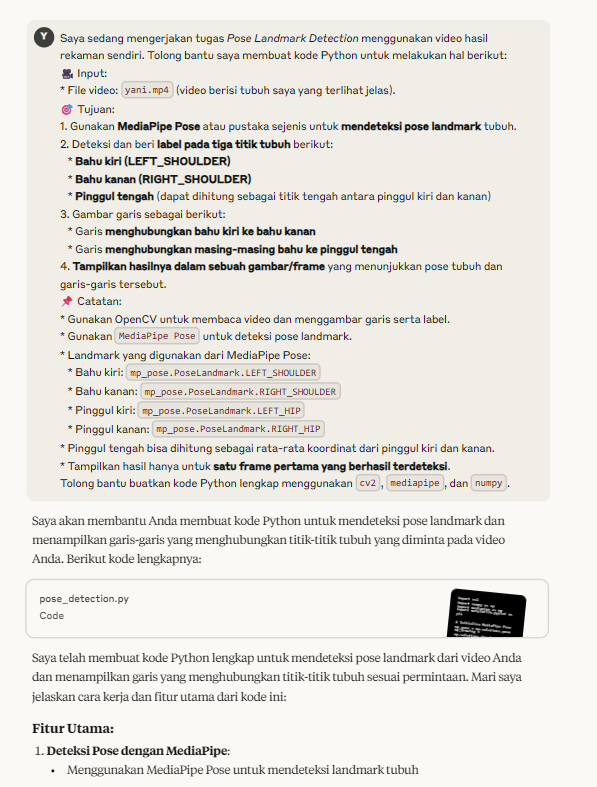
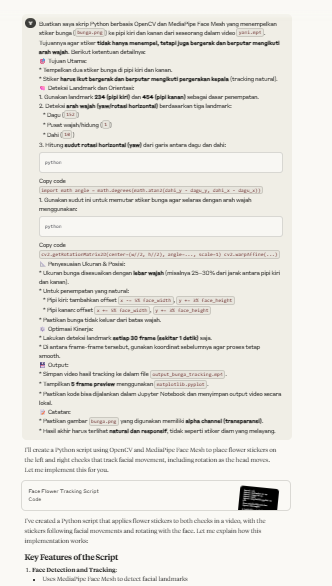
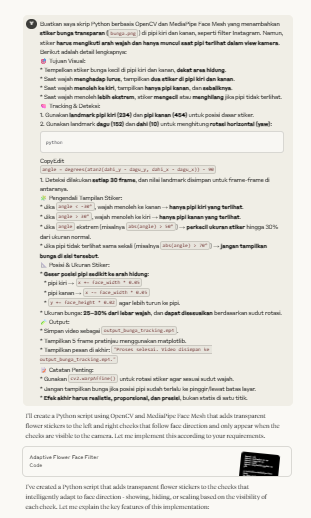
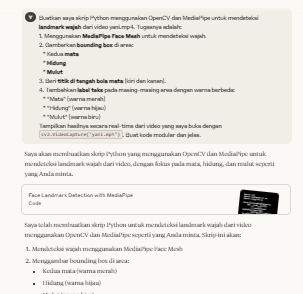
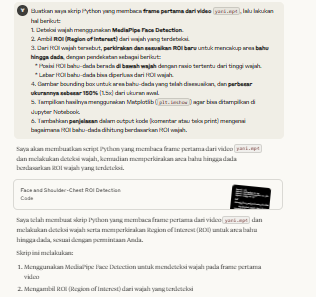
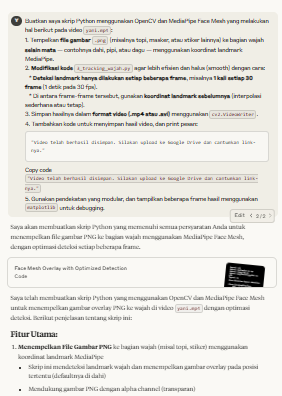
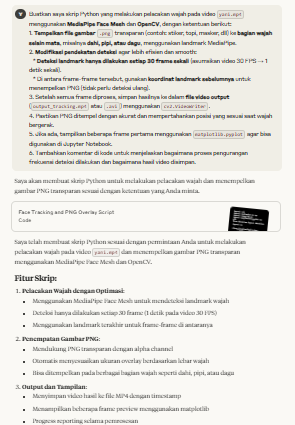

 ![Cuplikan layar 2025-05-14 221734.png](<attachment:Cuplikan layar 2025-05-14 221734.png>) ![Cuplikan layar 2025-05-14 221726.png](<attachment:Cuplikan layar 2025-05-14 221726.png>) ![Cuplikan layar 2025-05-14 221708.png](<attachment:Cuplikan layar 2025-05-14 221708.png>)
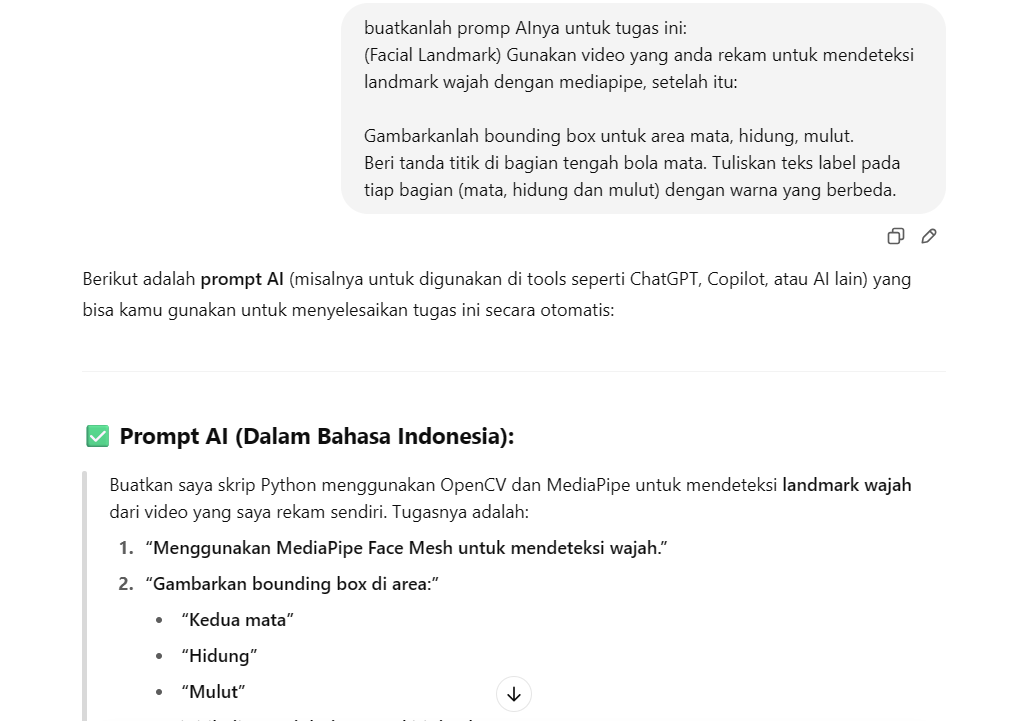
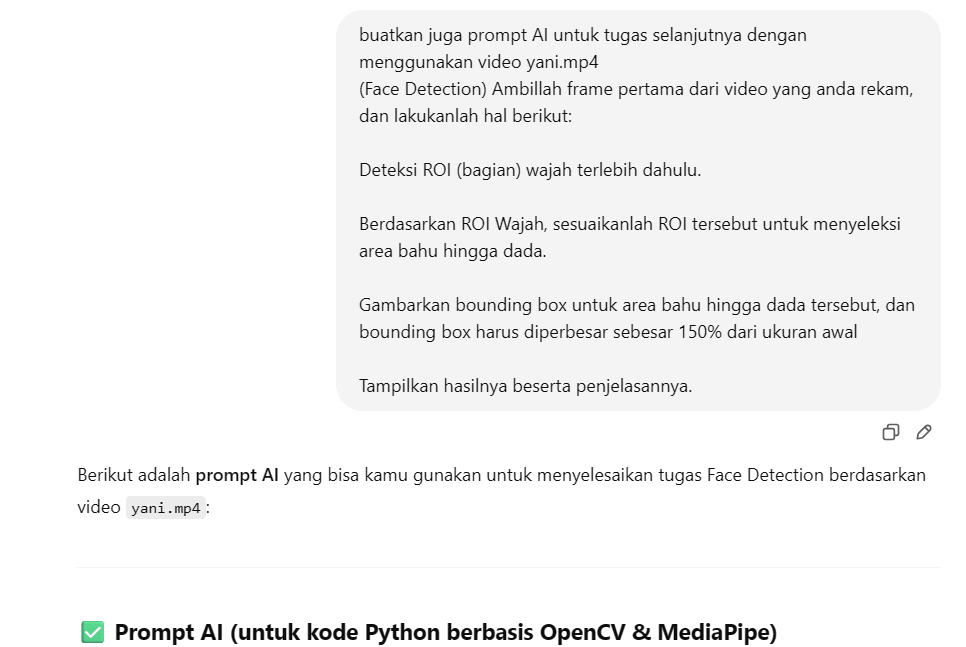
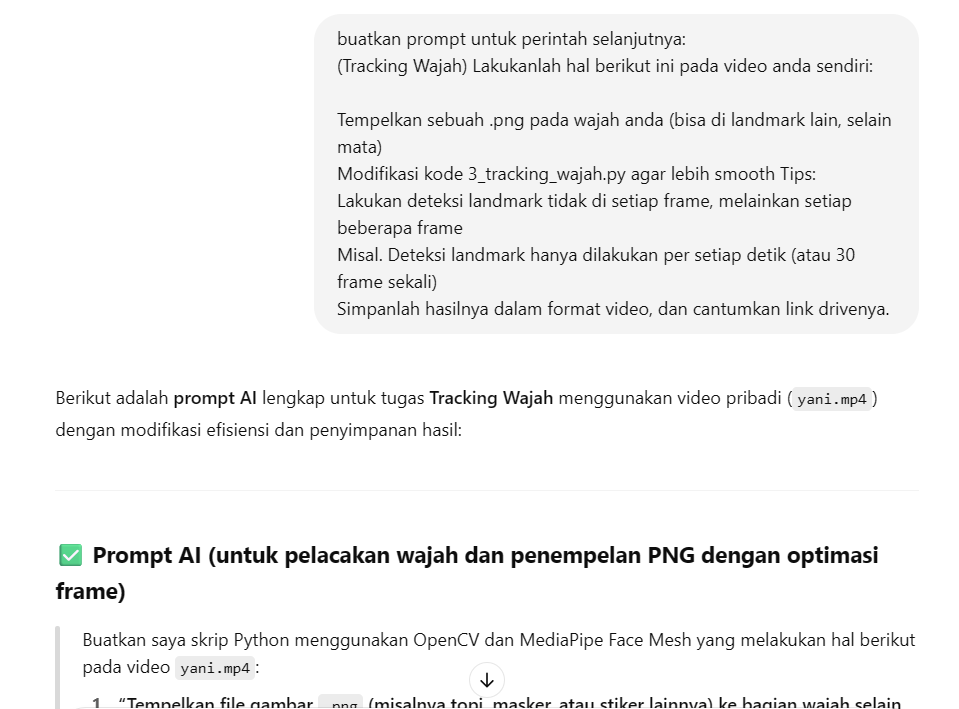